In [1]:
!pip install pandas numpy matplotlib seaborn plotly folium scipy scikit-learn


   ---------------------------------------- 0/2 [branca]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import variation
import warnings

warnings.filterwarnings('ignore')

# Visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [6]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [9]:
## Enroll
enrol_0_500k = pd.read_csv("Enrollment/api_data_aadhar_enrolment_0_500000.csv")
enrol_500k_1m = pd.read_csv("Enrollment/api_data_aadhar_enrolment_500000_1000000.csv")
enrol_1m_1006k = pd.read_csv("Enrollment/api_data_aadhar_enrolment_1000000_1006029.csv")


In [11]:
## Demographic
demo_0_500k = pd.read_csv("Demographic/api_data_aadhar_demographic_0_500000.csv")
demo_500k_1m = pd.read_csv("Demographic/api_data_aadhar_demographic_500000_1000000.csv")
demo_1m_1500k = pd.read_csv("Demographic/api_data_aadhar_demographic_1000000_1500000.csv")
demo_1500k_2m = pd.read_csv("Demographic/api_data_aadhar_demographic_1500000_2000000.csv")
demo_2m_2071k = pd.read_csv("Demographic/api_data_aadhar_demographic_2000000_2071700.csv")


In [13]:
## Biometric 
bio_0_500k = pd.read_csv("Biometric/api_data_aadhar_biometric_0_500000.csv")
bio_500k_1m = pd.read_csv("Biometric/api_data_aadhar_biometric_500000_1000000.csv")
bio_1m_1500k = pd.read_csv("Biometric/api_data_aadhar_biometric_1000000_1500000.csv")
bio_1500k_1861k = pd.read_csv("Biometric/api_data_aadhar_biometric_1500000_1861108.csv")


In [14]:
enrol = pd.concat(
    [enrol_0_500k, enrol_500k_1m, enrol_1m_1006k],
    ignore_index=True
)

demo = pd.concat(
    [demo_0_500k, demo_500k_1m, demo_1m_1500k, demo_1500k_2m, demo_2m_2071k],
    ignore_index=True
)

bio = pd.concat(
    [bio_0_500k, bio_500k_1m, bio_1m_1500k, bio_1500k_1861k],
    ignore_index=True
)


In [15]:
print(f"Enrolment Dataset Shape: {enrol.shape}")
print(f"Demographic Dataset Shape: {demo.shape}")
print(f"Biometric Dataset Shape: {bio.shape}")


Enrolment Dataset Shape: (1006029, 7)
Demographic Dataset Shape: (2071700, 6)
Biometric Dataset Shape: (1861108, 6)


In [16]:
print("\n🔹 Enrolment Dataset Preview")
display(enrol.head())

print("\n🔹 Demographic Dataset Preview")
display(demo.head())

print("\n🔹 Biometric Dataset Preview")
display(bio.head())



🔹 Enrolment Dataset Preview


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21



🔹 Demographic Dataset Preview


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785



🔹 Biometric Dataset Preview


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [ ]:
def standardize_data(enrol, demo, bio):
    """
    Standardize enrolment, demographic, and biometric datasets 
    into a common, analysis-ready format.
    """
    for df in [enrol, demo, bio]:
        df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
        df['year_month'] = df['date'].dt.to_period('M')

    enrol.columns = [
        'date', 'state', 'district', 'pincode',
        'age_0_5', 'age_5_17', 'age_18_greater',
        'year_month'
    ]

    if {'demo_age_5_17', 'demo_age_17_'}.issubset(demo.columns):
        demo.columns = [
            'date', 'state', 'district', 'pincode',
            'demo_age_5_17', 'demo_age_17_',
            'year_month'
        ]
    else:
        print("⚠️ Demographic dataset columns detected:")
        print(demo.columns.tolist())

    if {'bio_age_5_17', 'bio_age_17_'}.issubset(bio.columns):
        bio.columns = [
            'date', 'state', 'district', 'pincode',
            'bio_age_5_17', 'bio_age_17_',
            'year_month'
        ]
    else:
        print("⚠️ Biometric dataset columns detected:")
        print(bio.columns.tolist())

    enrol.fillna(0, inplace=True)
    demo.fillna(0, inplace=True)
    bio.fillna(0, inplace=True)

    for col in ['age_0_5', 'age_5_17', 'age_18_greater']:
        enrol[col] = pd.to_numeric(enrol[col], errors='coerce').fillna(0)

    for col in ['demo_age_5_17', 'demo_age_17_']:
        demo[col] = pd.to_numeric(demo[col], errors='coerce').fillna(0)

    for col in ['bio_age_5_17', 'bio_age_17_']:
        bio[col] = pd.to_numeric(bio[col], errors='coerce').fillna(0)

    for df in [enrol, demo, bio]:
        df['state'] = df['state'].astype(str).str.strip().str.title()
        df['district'] = df['district'].astype(str).str.strip().str.title()

    return enrol, demo, bio


In [19]:
enrol_clean, demo_clean, bio_clean = standardize_data(
    enrol.copy(),
    demo.copy(),
    bio.copy()
)


In [20]:
print("✅ Data standardized successfully!\n")

print(f"📅 Date Range: {enrol_clean['date'].min()} → {enrol_clean['date'].max()}")
print(f"🏛️ Total States: {enrol_clean['state'].nunique()}")
print(f"📍 Total Districts: {enrol_clean['district'].nunique()}")
print(f"🧾 Enrolment Records: {enrol_clean.shape[0]}")
print(f"🧾 Demographic Records: {demo_clean.shape[0]}")
print(f"🧾 Biometric Records: {bio_clean.shape[0]}")


✅ Data standardized successfully!

📅 Date Range: 2025-03-02 00:00:00 → 2025-12-31 00:00:00
🏛️ Total States: 49
📍 Total Districts: 964
🧾 Enrolment Records: 1006029
🧾 Demographic Records: 2071700
🧾 Biometric Records: 1861108


In [21]:
display(enrol_clean.head())
display(demo_clean.head())
display(bio_clean.head())


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,year_month
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,2025-03
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,2025-03
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,2025-03
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,2025-03
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,2025-03


,date,state,district,pincode,demo_age_5_17,demo_age_17_,year_month
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,2025-03
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,2025-03
2,2025-03-01,Gujarat,Rajkot,360006,65,765,2025-03
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,2025-03
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,2025-03


,date,state,district,pincode,bio_age_5_17,bio_age_17_,year_month
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,2025-03
1,2025-03-01,Bihar,Madhepura,852121,144,369,2025-03
2,2025-03-01,Jammu And Kashmir,Punch,185101,643,1091,2025-03
3,2025-03-01,Bihar,Bhojpur,802158,256,980,2025-03
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,2025-03


## Aggregation to district month level

In [ ]:
def aggregate_to_district_month(enrol, demo, bio):
    """
    Aggregate enrolment, demographic, and biometric datasets
    to district–month level for trend analysis.
    """
    enrol_agg = (
        enrol
        .groupby(['year_month', 'state', 'district'], as_index=False)
        .agg({
            'age_0_5': 'sum',
            'age_5_17': 'sum',
            'age_18_greater': 'sum'
        })
    )

    demo_agg = (
        demo
        .groupby(['year_month', 'state', 'district'], as_index=False)
        .agg({
            'demo_age_5_17': 'sum',
            'demo_age_17_': 'sum'
        })
    )

    bio_agg = (
        bio
        .groupby(['year_month', 'state', 'district'], as_index=False)
        .agg({
            'bio_age_5_17': 'sum',
            'bio_age_17_': 'sum'
        })
    )
    merged = enrol_agg.merge(
        demo_agg,
        on=['year_month', 'state', 'district'],
        how='left'
    )

    merged = merged.merge(
        bio_agg,
        on=['year_month', 'state', 'district'],
        how='left'
    )

    merged.fillna(0, inplace=True)

    merged.sort_values(
        by=['state', 'district', 'year_month'],
        inplace=True
    )
    merged['child_total_enrol'] = merged['age_0_5'] + merged['age_5_17']
    merged['adult_enrol'] = merged['age_18_greater']
    merged['total_enrol'] = merged['child_total_enrol'] + merged['adult_enrol']

    merged['child_updates'] = merged['demo_age_5_17'] + merged['bio_age_5_17']
    merged['adult_updates'] = merged['demo_age_17_'] + merged['bio_age_17_']
    merged['total_updates'] = merged['child_updates'] + merged['adult_updates']

    return merged

In [23]:
data = aggregate_to_district_month(
    enrol_clean,
    demo_clean,
    bio_clean
)


In [24]:
print("✅ District–Month Aggregation Completed\n")

print(f"📦 Aggregated Data Shape: {data.shape}")
print(f"🗂️ Unique District–Month Records: {data[['district', 'year_month']].drop_duplicates().shape[0]}")
print(f"🏛️ States Covered: {data['state'].nunique()}")
print(f"📍 Districts Covered: {data['district'].nunique()}")


✅ District–Month Aggregation Completed

📦 Aggregated Data Shape: (5004, 16)
🗂️ Unique District–Month Records: 4728
🏛️ States Covered: 49
📍 Districts Covered: 964


In [25]:
display(data.head(10))


,year_month,state,district,age_0_5,age_5_17,age_18_greater,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,child_total_enrol,adult_enrol,total_enrol,child_updates,adult_updates,total_updates
1082,2025-09,100000,100000,0,0,12,0.0,0.0,0.0,0.0,0,12,12,0.0,0.0,0.0
2066,2025-10,100000,100000,0,1,0,0.0,0.0,0.0,0.0,1,0,1,0.0,0.0,0.0
3044,2025-11,100000,100000,0,0,11,0.0,0.0,0.0,0.0,0,11,11,0.0,0.0,0.0
4024,2025-12,100000,100000,0,0,194,0.0,2.0,0.0,0.0,0,194,194,0.0,2.0,2.0
1083,2025-09,Andaman & Nicobar Islands,Andamans,23,4,0,3.0,159.0,76.0,241.0,27,0,27,79.0,400.0,479.0
2067,2025-10,Andaman & Nicobar Islands,Andamans,15,0,0,2.0,73.0,43.0,139.0,15,0,15,45.0,212.0,257.0
3045,2025-11,Andaman & Nicobar Islands,Andamans,13,0,0,0.0,212.0,48.0,174.0,13,0,13,48.0,386.0,434.0
4025,2025-12,Andaman & Nicobar Islands,Andamans,19,1,0,2.0,299.0,90.0,232.0,20,0,20,92.0,531.0,623.0
1084,2025-09,Andaman & Nicobar Islands,Nicobars,1,0,0,0.0,0.0,1.0,0.0,1,0,1,1.0,0.0,1.0
1085,2025-09,Andaman & Nicobar Islands,South Andaman,15,0,0,3.0,69.0,24.0,87.0,15,0,15,27.0,156.0,183.0


## TREND 1: BIOMETRIC DROP-OFF RATIO

In [66]:
def compute_biometric_dropoff(data):
    """
    Compute biometric drop-off ratio using a ~2-year (24-month) lag
    at district level.
    """
    data_copy = data.copy()
    data_copy['year_month_num'] = (
        data_copy
        .groupby(['state', 'district'])
        .cumcount()
    )
    data_copy['child_enrol_lagged_2y'] = (
        data_copy
        .groupby(['state', 'district'])['child_total_enrol']
        .shift(24)
    )
    data_copy['bio_dropoff_ratio'] = (
        data_copy['bio_age_5_17'] /
        (data_copy['child_enrol_lagged_2y'] + 1)   # +1 avoids division by zero
    )

    data_copy['bio_dropoff_ratio'] = (
        data_copy['bio_dropoff_ratio']
        .fillna(0)
        .clip(0, 1)
    )
    dropoff_by_district = (
        data_copy
        .groupby(['state', 'district'], as_index=False)
        .agg({
            'bio_dropoff_ratio': 'mean',
            'child_total_enrol': 'mean',
            'bio_age_5_17': 'mean'
        })
        .sort_values('bio_dropoff_ratio')
    )

    return data_copy, dropoff_by_district


In [27]:
data, dropoff_districts = compute_biometric_dropoff(data)


In [28]:
print("⚠️ Top 20 districts with HIGHEST biometric drop-off risk (lowest ratios):\n")
display(dropoff_districts.head(20))


⚠️ Top 20 districts with HIGHEST biometric drop-off risk (lowest ratios):



,state,district,bio_dropoff_ratio,child_total_enrol,bio_age_5_17
1039,West Bengal,South Dinajpur,0.0,111.500,58.000000
1038,West Bengal,South 24 Parganas,0.0,8309.500,9079.500000
1037,West Bengal,South 24 Pargana,0.0,1.000,0.500000
1036,West Bengal,Puruliya,0.0,3271.500,4071.000000
1035,West Bengal,Purulia,0.0,195.500,124.250000
1034,West Bengal,Purba Medinipur,0.0,3566.000,6093.500000
1033,West Bengal,Purba Bardhaman,0.0,582.600,598.200000
1032,West Bengal,Paschim Medinipur,0.0,4483.750,7807.250000
1031,West Bengal,Paschim Bardhaman,0.0,295.750,431.000000
1030,West Bengal,North Twenty Four Parganas,0.0,406.250,297.250000


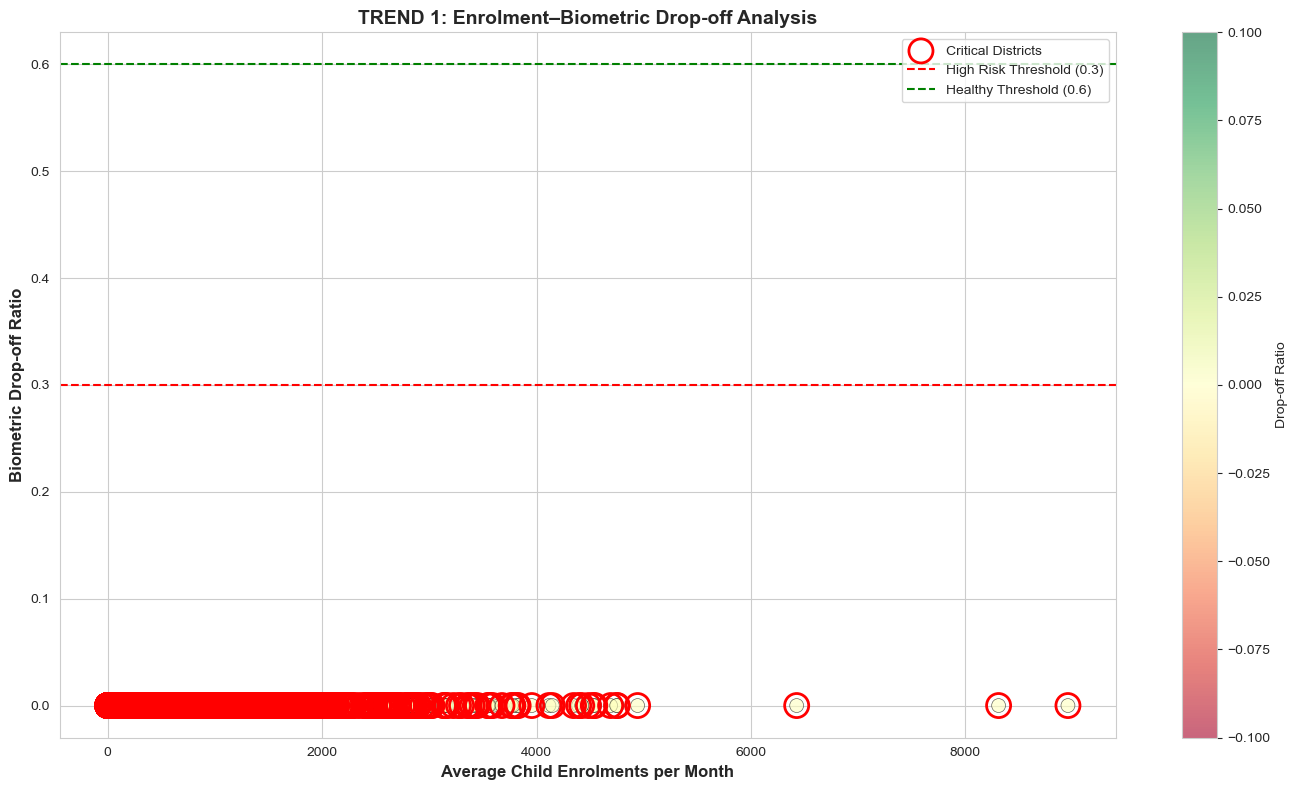

In [29]:
fig, ax = plt.subplots(figsize=(14, 8))

scatter = ax.scatter(
    dropoff_districts['child_total_enrol'],
    dropoff_districts['bio_dropoff_ratio'],
    c=dropoff_districts['bio_dropoff_ratio'],
    s=100,
    cmap='RdYlGn',
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
critical = dropoff_districts[dropoff_districts['bio_dropoff_ratio'] < 0.3]

ax.scatter(
    critical['child_total_enrol'],
    critical['bio_dropoff_ratio'],
    s=300,
    facecolors='none',
    edgecolors='red',
    linewidth=2,
    label='Critical Districts'
)
ax.set_xlabel(
    'Average Child Enrolments per Month',
    fontsize=12,
    fontweight='bold'
)
ax.set_ylabel(
    'Biometric Drop-off Ratio',
    fontsize=12,
    fontweight='bold'
)
ax.set_title(
    'TREND 1: Enrolment–Biometric Drop-off Analysis',
    fontsize=14,
    fontweight='bold'
)
ax.axhline(y=0.3, color='red', linestyle='--', label='High Risk Threshold (0.3)')
ax.axhline(y=0.6, color='green', linestyle='--', label='Healthy Threshold (0.6)')
ax.legend()
plt.colorbar(scatter, ax=ax, label='Drop-off Ratio')
plt.tight_layout()
plt.savefig(
    'trend1_biometric_dropoff.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()


In [30]:
print(f"🔴 Critical districts (drop-off < 0.3): {len(critical)}")

at_risk = dropoff_districts[
    (dropoff_districts['bio_dropoff_ratio'] >= 0.3) &
    (dropoff_districts['bio_dropoff_ratio'] < 0.6)
]

print(f"🟠 At-risk districts (drop-off 0.3–0.6): {len(at_risk)}")


🔴 Critical districts (drop-off < 0.3): 1045
🟠 At-risk districts (drop-off 0.3–0.6): 0


## TREND 2: DISTRICT-LEVEL INEQUALITY ANALYSIS

In [67]:
def compute_district_inequality(data):
    """
    Compute district-level inequality in child enrolment using
    Coefficient of Variation (CV) and Gini coefficient per state.
    """
    district_stats = (
        data
        .groupby(['state', 'district'], as_index=False)
        .agg({
            'child_total_enrol': 'mean',
            'bio_dropoff_ratio': 'mean',
            'demo_age_5_17': 'mean'
        })
    )
    def gini(x):
        x = np.array(x).flatten()
        x = x[x > 0]  # consider only positive values
        n = len(x)
        if n == 0:
            return 0
        sorted_x = np.sort(x)
        cumsum = np.cumsum(sorted_x)
        return (2 * np.sum(cumsum)) / (n * cumsum[-1]) - (n + 1) / n
    inequality = (
        district_stats
        .groupby('state')
        .agg(
            child_enrol_mean=('child_total_enrol', 'mean'),
            child_enrol_std=('child_total_enrol', 'std'),
            child_enrol_min=('child_total_enrol', 'min'),
            child_enrol_max=('child_total_enrol', 'max'),
            cv_child_enrol=('child_total_enrol',
                             lambda x: x.std() / x.mean() if x.mean() > 0 else 0),
            gini_child_enrol=('child_total_enrol', gini),
            bio_dropoff_mean=('bio_dropoff_ratio', 'mean'),
            bio_dropoff_std=('bio_dropoff_ratio', 'std')
        )
        .reset_index()
        .sort_values('cv_child_enrol', ascending=False)
    )
    bottom_districts = []

    for state in district_stats['state'].unique():
        state_data = district_stats[district_stats['state'] == state]
        threshold = state_data['child_total_enrol'].quantile(0.25)
        bottom = state_data[state_data['child_total_enrol'] < threshold]
        bottom_districts.append(bottom)
    bottom_all = pd.concat(bottom_districts, ignore_index=True)
    return inequality, district_stats, bottom_all


In [32]:
inequality_by_state, district_stats, bottom_districts = compute_district_inequality(data)


In [33]:
print("⚠️ States with HIGHEST district-level inequality:\n")

display(
    inequality_by_state[
        ['state', 'child_enrol_mean', 'cv_child_enrol', 'gini_child_enrol']
    ].head(15)
)


⚠️ States with HIGHEST district-level inequality:



,state,child_enrol_mean,cv_child_enrol,gini_child_enrol
35,Puducherry,106.520833,1.429635,-0.625709
7,Chandigarh,269.150000,1.406332,-0.497213
33,Orissa,29.819048,1.399080,-0.646726
34,Pondicherry,106.000000,1.357565,-0.554507
19,Jammu & Kashmir,3.205556,1.352351,-0.520393
47,West Bengal,1593.331214,1.260864,-0.608386
4,Arunachal Pradesh,39.706667,1.247673,-0.548059
40,Telangana,680.872817,1.182647,-0.534583
22,Karnataka,922.226970,1.147098,-0.489367
3,Andhra Pradesh,669.944681,1.088147,-0.543830


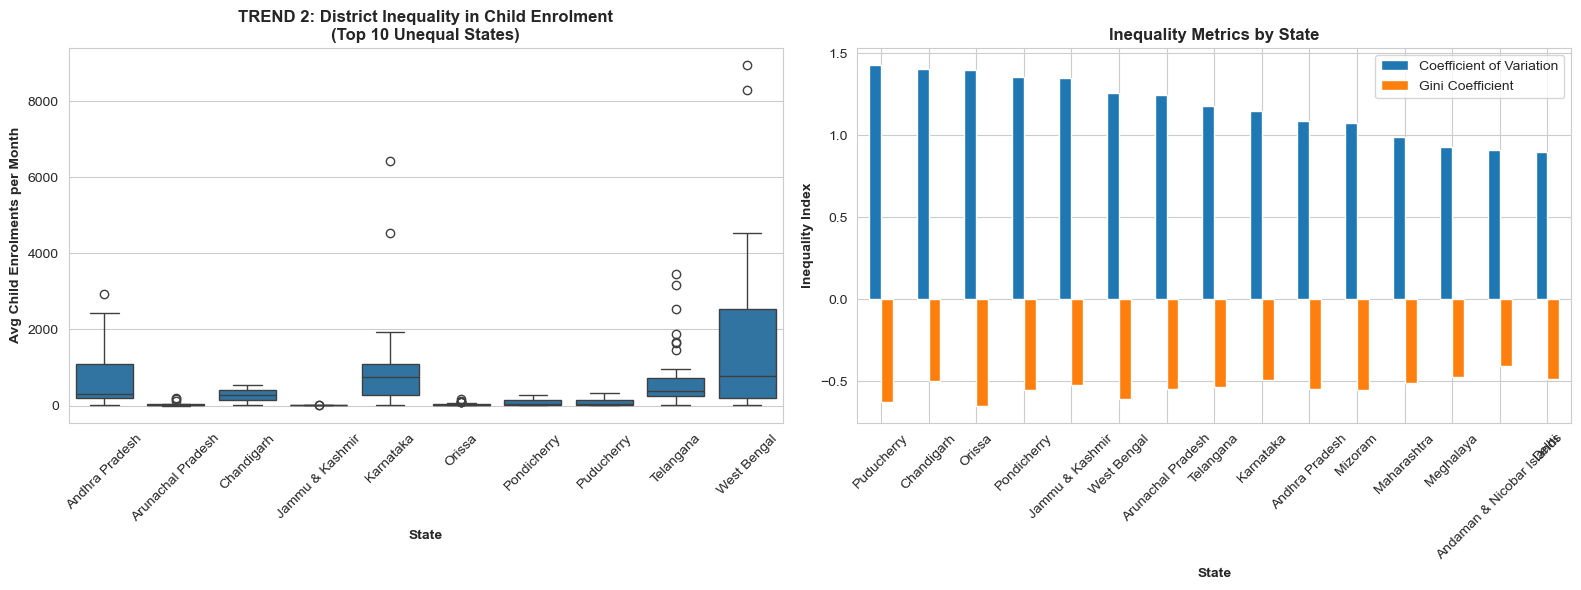

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_unequal_states = inequality_by_state.head(10)['state'].tolist()
data_subset = district_stats[district_stats['state'].isin(top_unequal_states)]

sns.boxplot(
    data=data_subset,
    x='state',
    y='child_total_enrol',
    ax=axes[0]
)

axes[0].set_title(
    'TREND 2: District Inequality in Child Enrolment\n(Top 10 Unequal States)',
    fontweight='bold'
)
axes[0].set_xlabel('State', fontweight='bold')
axes[0].set_ylabel('Avg Child Enrolments per Month', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

inequality_by_state.head(15).plot(
    x='state',
    y=['cv_child_enrol', 'gini_child_enrol'],
    kind='bar',
    ax=axes[1]
)

axes[1].set_title('Inequality Metrics by State', fontweight='bold')
axes[1].set_xlabel('State', fontweight='bold')
axes[1].set_ylabel('Inequality Index', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(['Coefficient of Variation', 'Gini Coefficient'])

plt.tight_layout()
plt.savefig(
    'trend2_district_inequality.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()


## TREND 3: DEMOGRAPHIC CORRECTION PRESSURE

In [40]:
def compute_correction_pressure(data):
    """
    Compute demographic correction pressure at district level
    and extract temporal trends for high-burden districts.
    """
    data_copy = data.copy()
    data_copy['correction_pressure'] = (
        data_copy['demo_age_5_17'] / (data_copy['age_5_17'] + 1)
    )

    data_copy['correction_pressure'] = (
        data_copy['correction_pressure']
        .fillna(0)
        .clip(0, 5)   # cap extreme outliers
    )
    correction_by_district = (
        data_copy
        .groupby(['state', 'district'], as_index=False)
        .agg(
            correction_pressure_mean=('correction_pressure', 'mean'),
            correction_pressure_std=('correction_pressure', 'std'),
            correction_pressure_max=('correction_pressure', 'max'),
            demo_updates_mean=('demo_age_5_17', 'mean'),
            child_enrol_5_17_mean=('age_5_17', 'mean')
        )
        .sort_values('correction_pressure_mean', ascending=False)
    )
    top_5_high_correction = correction_by_district.head(5)

    trend_data_list = []

    for _, row in top_5_high_correction.iterrows():
        subset = (
            data_copy[
                (data_copy['state'] == row['state']) &
                (data_copy['district'] == row['district'])
            ][['year_month', 'correction_pressure']]
            .copy()
        )

        subset['label'] = f"{row['district']}, {row['state']}"
        trend_data_list.append(subset)

    trend_all = pd.concat(trend_data_list, ignore_index=True)

    return data_copy, correction_by_district, trend_all


In [41]:
data, correction_districts, correction_trend = compute_correction_pressure(data)


In [42]:
print("⚠️ Top 20 districts with HIGHEST demographic correction pressure:\n")

display(
    correction_districts[
        ['state', 'district', 'correction_pressure_mean', 'demo_updates_mean']
    ].head(20)
)


⚠️ Top 20 districts with HIGHEST demographic correction pressure:



,state,district,correction_pressure_mean,demo_updates_mean
6,Andaman And Nicobar Islands,South Andaman,5.0,90.00
9,Andhra Pradesh,Anakapalli,5.0,305.25
10,Andhra Pradesh,Anantapur,5.0,1987.25
29,Andhra Pradesh,Kurnool,5.0,3881.00
28,Andhra Pradesh,Krishna,5.0,2444.50
27,Andhra Pradesh,Khammam,5.0,1054.25
527,Maharashtra,Bhandara,5.0,331.00
34,Andhra Pradesh,N. T. R,5.0,594.00
36,Andhra Pradesh,Nandyal,5.0,435.50
39,Andhra Pradesh,Palnadu,5.0,416.75


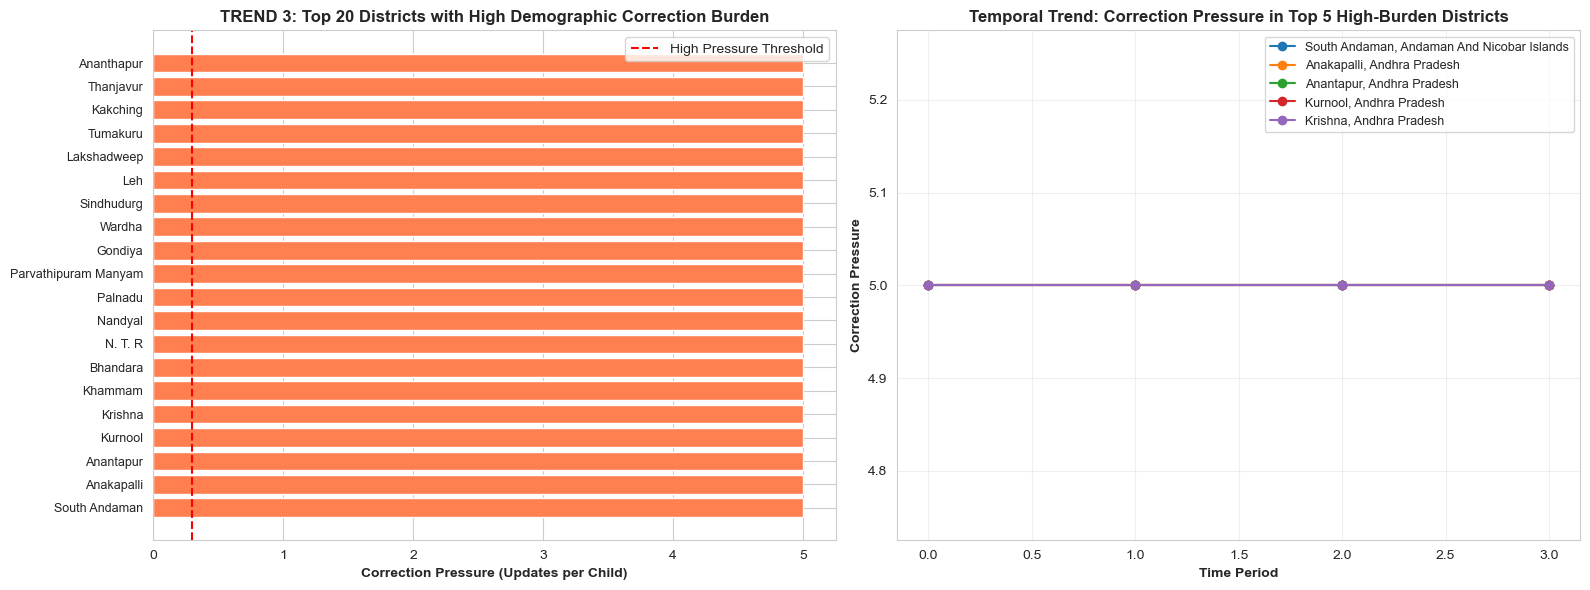

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_20 = correction_districts.head(20)

axes[0].barh(
    range(len(top_20)),
    top_20['correction_pressure_mean'],
    color='coral'
)

axes[0].set_yticks(range(len(top_20)))
axes[0].set_yticklabels(
    [row['district'][:20] for _, row in top_20.iterrows()],
    fontsize=9
)

axes[0].set_xlabel('Correction Pressure (Updates per Child)', fontweight='bold')
axes[0].set_title(
    'TREND 3: Top 20 Districts with High Demographic Correction Burden',
    fontweight='bold'
)

axes[0].axvline(
    x=0.3,
    color='red',
    linestyle='--',
    label='High Pressure Threshold'
)
axes[0].legend()

for label in correction_trend['label'].unique():
    subset = correction_trend[correction_trend['label'] == label]
    axes[1].plot(
        range(len(subset)),
        subset['correction_pressure'],
        marker='o',
        label=label
    )

axes[1].set_xlabel('Time Period', fontweight='bold')
axes[1].set_ylabel('Correction Pressure', fontweight='bold')
axes[1].set_title(
    'Temporal Trend: Correction Pressure in Top 5 High-Burden Districts',
    fontweight='bold'
)

axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(
    'trend3_correction_pressure.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()


## TREND 4: PERSISTENT HIGH-RISK DISTRICTS

In [45]:
def compute_persistence_risk(data):
    """
    Compute persistently high-risk districts using a composite risk score
    across multiple months.
    """
    data_copy = data.copy()
    data_copy['bio_dropoff_norm'] = data_copy.groupby('year_month')['bio_dropoff_ratio'].transform(
        lambda x: (x - x.min()) / (x.max() - x.min() + 0.01)
    )
    data_copy['correction_norm'] = data_copy.groupby('year_month')['correction_pressure'].transform(
        lambda x: (x - x.min()) / (x.max() - x.min() + 0.01)
    )
    data_copy['enrol_norm'] = 1 - data_copy.groupby('year_month')['child_total_enrol'].transform(
        lambda x: (x - x.min()) / (x.max() - x.min() + 0.01)
    )
    data_copy['risk_score'] = (
        0.4 * data_copy['bio_dropoff_norm'] +
        0.3 * data_copy['correction_norm'] +
        0.2 * data_copy['enrol_norm']
    )
    risk_threshold = data_copy['risk_score'].quantile(0.75)
    persistence = (
        data_copy
        .groupby(['state', 'district'])
        .agg(
            avg_risk_score=('risk_score', 'mean'),
            total_months=('risk_score', 'count'),
            high_risk_months=('risk_score', lambda x: (x > risk_threshold).sum())
        )
        .reset_index()
    )
    persistence['persistence_pct'] = (
        persistence['high_risk_months'] / persistence['total_months'] * 100
    ).round(2)
    persistence = persistence.sort_values('avg_risk_score', ascending=False)
    persistent_high_risk = persistence[persistence['persistence_pct'] >= 70]

    return data_copy, persistent_high_risk, persistence


In [46]:
data, persistent_high_risk, persistence_all = compute_persistence_risk(data)


In [47]:
print("⚠️ Top 30 PERSISTENT HIGH-RISK districts (≥70% months in high-risk zone):\n")

display(
    persistent_high_risk[
        ['state', 'district', 'avg_risk_score', 'persistence_pct']
    ].head(30)
)


⚠️ Top 30 PERSISTENT HIGH-RISK districts (≥70% months in high-risk zone):



,state,district,avg_risk_score,persistence_pct
773,Rajasthan,Salumbar,0.499363,100.0
743,Rajasthan,Beawar,0.499363,100.0
755,Rajasthan,Didwana-Kuchaman,0.499325,100.0
54,Arunachal Pradesh,Anjaw,0.499247,100.0
213,Daman And Diu,Daman,0.499072,100.0
214,Daman And Diu,Diu,0.499020,100.0
609,Mizoram,Serchhip,0.498924,100.0
519,Maharashtra,Ahilyanagar,0.498904,100.0
578,Manipur,Kakching,0.498827,100.0
456,Ladakh,Leh,0.498738,100.0


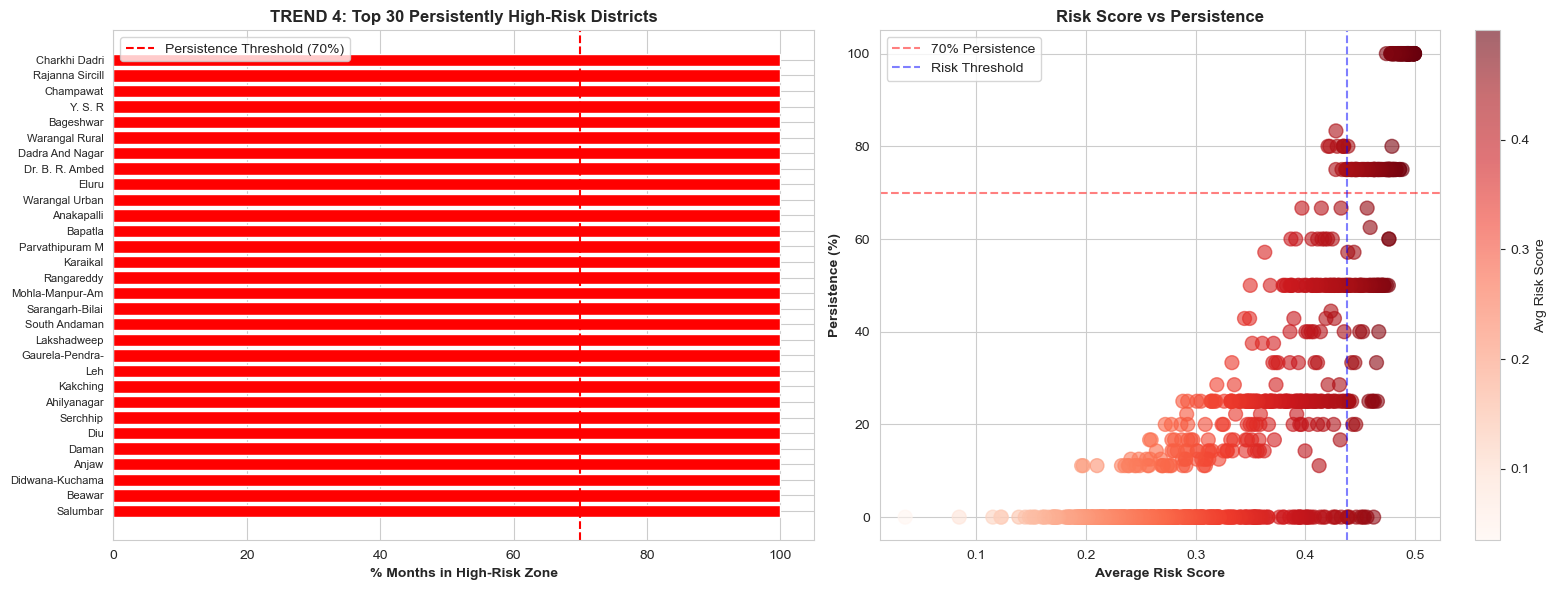

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_30 = persistent_high_risk.head(30)

colors = [
    'red' if pct >= 90 else
    'orange' if pct >= 80 else
    'yellow'
    for pct in top_30['persistence_pct']
]

axes[0].barh(
    range(len(top_30)),
    top_30['persistence_pct'],
    color=colors
)

axes[0].set_yticks(range(len(top_30)))
axes[0].set_yticklabels(
    [row['district'][:15] for _, row in top_30.iterrows()],
    fontsize=8
)

axes[0].set_xlabel('% Months in High-Risk Zone', fontweight='bold')
axes[0].set_title(
    'TREND 4: Top 30 Persistently High-Risk Districts',
    fontweight='bold'
)
axes[0].axvline(
    x=70,
    color='red',
    linestyle='--',
    label='Persistence Threshold (70%)'
)
axes[0].legend()

risk_threshold = persistence_all['avg_risk_score'].quantile(0.75)

scatter = axes[1].scatter(
    persistence_all['avg_risk_score'],
    persistence_all['persistence_pct'],
    s=100,
    alpha=0.6,
    c=persistence_all['avg_risk_score'],
    cmap='Reds'
)

axes[1].axhline(y=70, color='red', linestyle='--', alpha=0.5, label='70% Persistence')
axes[1].axvline(x=risk_threshold, color='blue', linestyle='--', alpha=0.5, label='Risk Threshold')

axes[1].set_xlabel('Average Risk Score', fontweight='bold')
axes[1].set_ylabel('Persistence (%)', fontweight='bold')
axes[1].set_title('Risk Score vs Persistence', fontweight='bold')
axes[1].legend()

plt.colorbar(scatter, ax=axes[1], label='Avg Risk Score')
plt.tight_layout()
plt.savefig('trend4_persistent_risk.png', dpi=300, bbox_inches='tight')
plt.show()


In [49]:
print(f"🔴 Total persistent high-risk districts: {len(persistent_high_risk)}")


🔴 Total persistent high-risk districts: 199


## TREND 5: SEASONALITY IN CHILD ENROLMENT

In [50]:
def compute_seasonality(data):
    """
    Compute seasonal indices of child enrolment
    and identify peak enrolment months by state.
    """
    data_copy = data.copy()
    data_copy['month'] = data_copy['year_month'].dt.month
    data_copy['annual_avg'] = (
        data_copy
        .groupby(['state', 'district'])['child_total_enrol']
        .transform('mean')
    )
    data_copy['seasonal_index'] = (
        data_copy['child_total_enrol'] / (data_copy['annual_avg'] + 1)
    ).clip(0, 3)
    state_seasonal = (
        data_copy
        .groupby(['state', 'month'], as_index=False)
        .agg(
            seasonal_index=('seasonal_index', 'mean'),
            child_total_enrol=('child_total_enrol', 'sum')
        )
        .sort_values(['state', 'month'])
    )
    peak_months = (
        state_seasonal[state_seasonal['seasonal_index'] > 1.1]
        .sort_values(['state', 'seasonal_index'], ascending=[True, False])
    )
    return data_copy, state_seasonal, peak_months

In [51]:
data, state_seasonal, peak_months = compute_seasonality(data)


In [52]:
print("📈 States with peak enrolment months (seasonal index > 1.1):\n")

display(
    peak_months
    .groupby('state')
    .head(3)
)


📈 States with peak enrolment months (seasonal index > 1.1):



,state,month,seasonal_index,child_total_enrol
8,Andaman And Nicobar Islands,9,1.584031,145
13,Andhra Pradesh,6,1.411376,1361
15,Andhra Pradesh,9,1.323759,39976
19,Arunachal Pradesh,7,1.752263,441
20,Arunachal Pradesh,9,1.564881,1768
...,...,...,...,...
288,Uttarakhand,7,1.145379,2342
291,Uttarakhand,11,1.106620,8600
293,West Bengal,9,2.000000,12
305,West Bengal,9,1.582312,118505


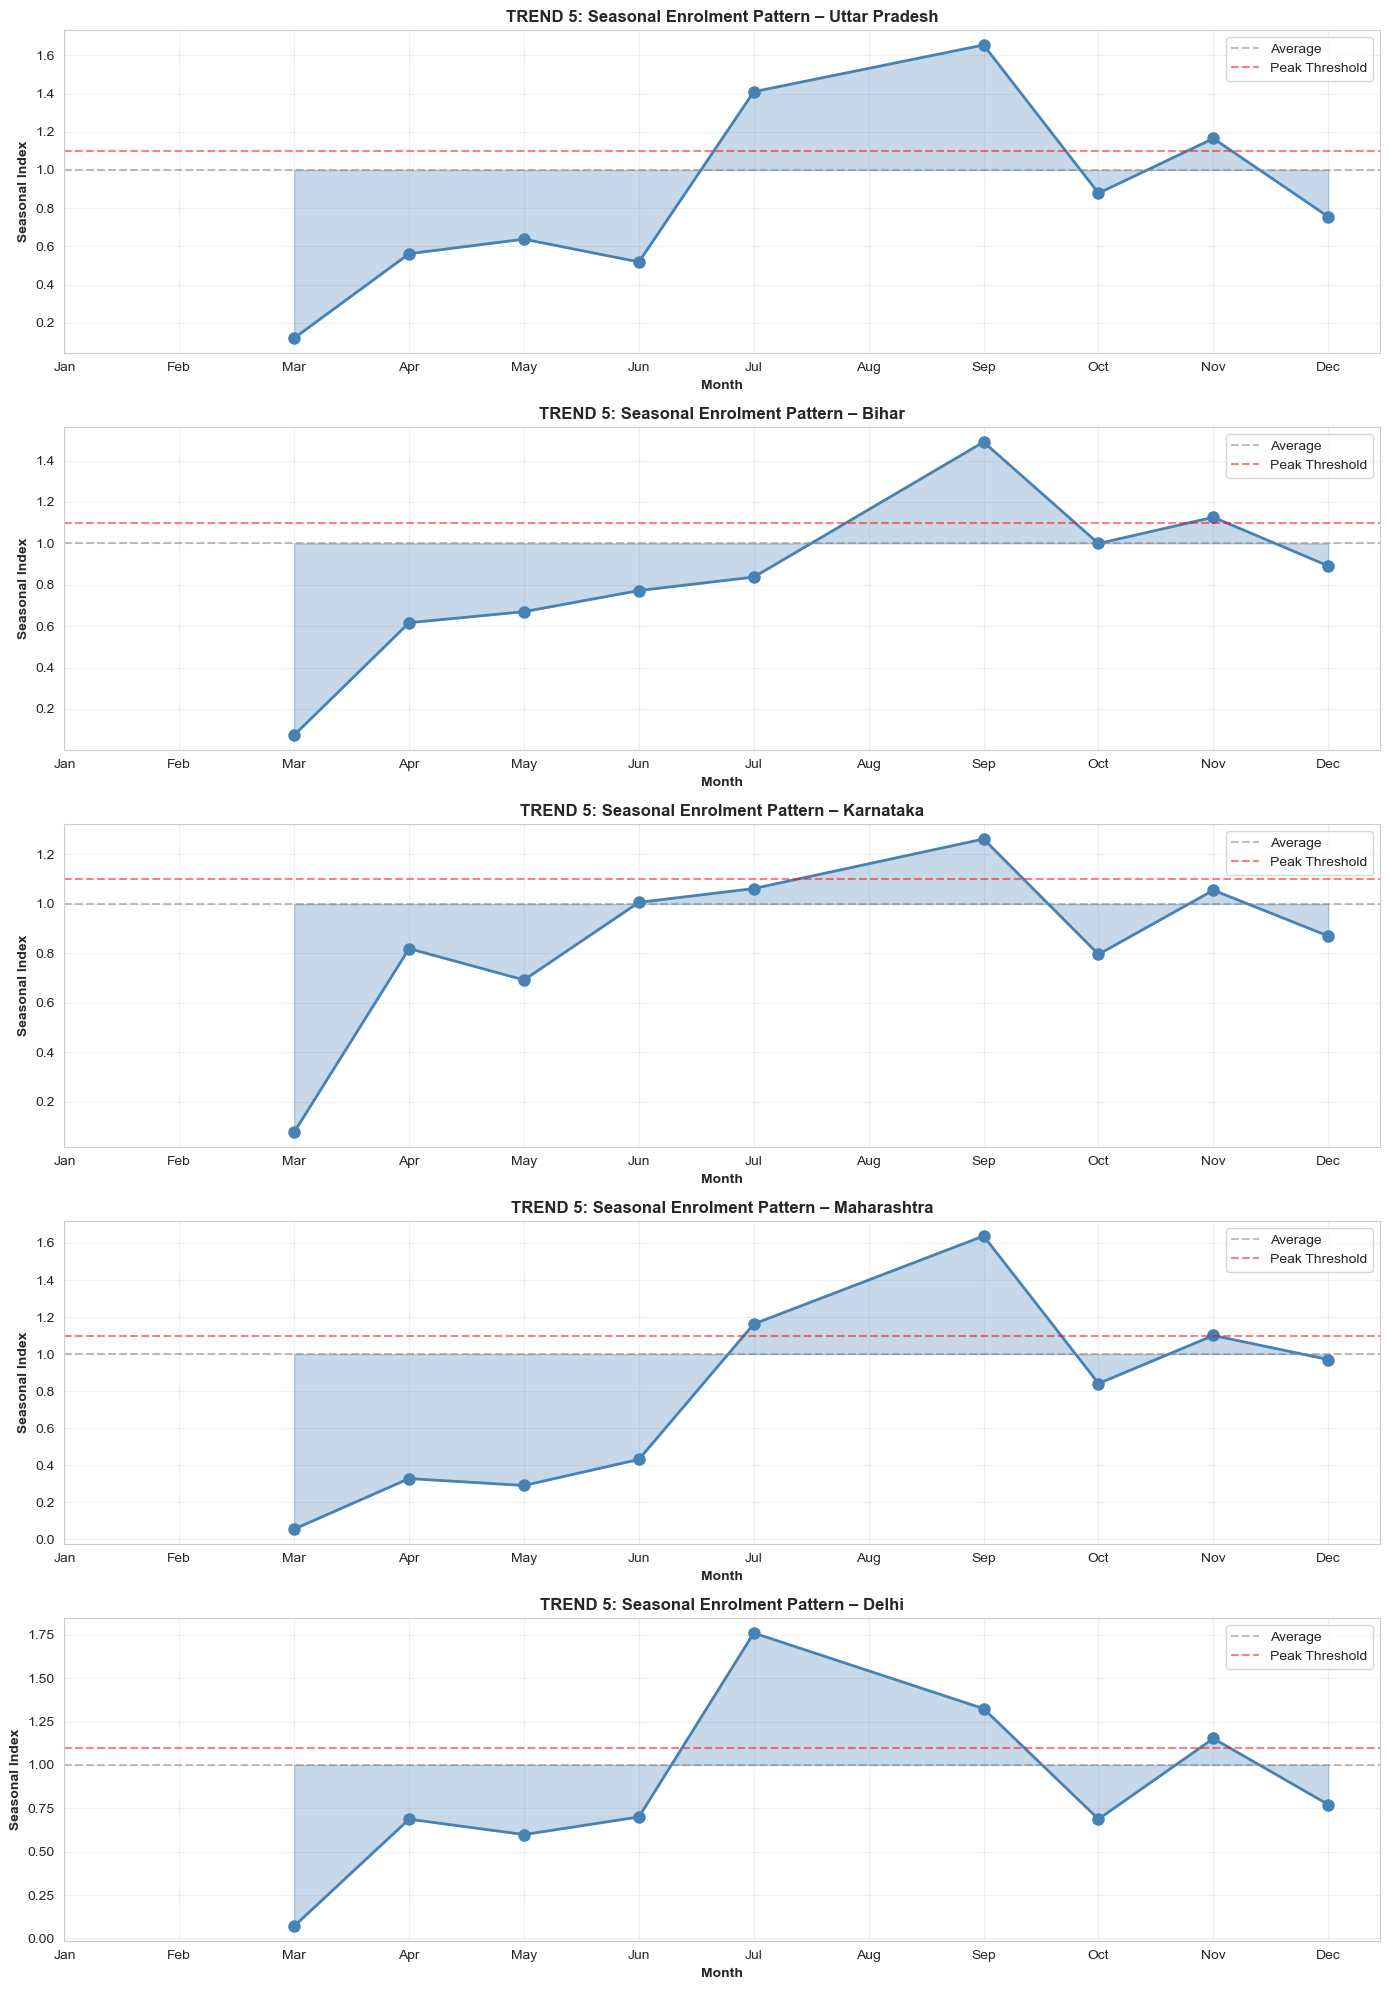

In [53]:
states_to_plot = [
    'Uttar Pradesh',
    'Bihar',
    'Karnataka',
    'Maharashtra',
    'Delhi'
]

available_states = [
    s for s in states_to_plot
    if s in state_seasonal['state'].unique()
]

fig, axes = plt.subplots(
    len(available_states),
    1,
    figsize=(14, 4 * len(available_states))
)

# Ensure axes is iterable
if len(available_states) == 1:
    axes = [axes]

for idx, state in enumerate(available_states):
    state_data = (
        state_seasonal[state_seasonal['state'] == state]
        .sort_values('month')
    )

    axes[idx].plot(
        state_data['month'],
        state_data['seasonal_index'],
        marker='o',
        linewidth=2,
        markersize=8,
        color='steelblue'
    )

    axes[idx].fill_between(
        state_data['month'],
        1,
        state_data['seasonal_index'],
        alpha=0.3,
        color='steelblue'
    )

    axes[idx].axhline(
        y=1.0,
        color='gray',
        linestyle='--',
        alpha=0.5,
        label='Average'
    )

    axes[idx].axhline(
        y=1.1,
        color='red',
        linestyle='--',
        alpha=0.5,
        label='Peak Threshold'
    )

    axes[idx].set_xlabel('Month', fontweight='bold')
    axes[idx].set_ylabel('Seasonal Index', fontweight='bold')
    axes[idx].set_title(
        f'TREND 5: Seasonal Enrolment Pattern – {state}',
        fontweight='bold'
    )

    axes[idx].set_xticks(range(1, 13))
    axes[idx].set_xticklabels(
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )

    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(
    'trend5_seasonality.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()


In [54]:
print(
    "🧠 Key Insight: School admission season (April–June) "
    "shows peak enrolment in most states."
)


🧠 Key Insight: School admission season (April–June) shows peak enrolment in most states.


## TREND 6: CHILD vs ADULT SERVICE FAIRNESS

In [55]:
def compute_fairness(data):
    """
    Compute fairness between child and adult services
    using enrolment vs update shares.
    """
    data_copy = data.copy()
    data_copy['child_share_enrol'] = (
        data_copy['child_total_enrol'] / (data_copy['total_enrol'] + 1)
    )

    data_copy['child_share_updates'] = (
        data_copy['child_updates'] / (data_copy['total_updates'] + 1)
    )
    data_copy['fairness_index'] = (
        data_copy['child_share_updates'] /
        (data_copy['child_share_enrol'] + 0.01)
    ).clip(0, 2)
    fairness_by_district = (
        data_copy
        .groupby(['state', 'district'], as_index=False)
        .agg(
            fairness_index=('fairness_index', 'mean'),
            child_share_enrol=('child_share_enrol', 'mean'),
            child_share_updates=('child_share_updates', 'mean')
        )
        .sort_values('fairness_index')
    )
    return data_copy, fairness_by_district

In [56]:
data, fairness_districts = compute_fairness(data)


In [57]:
print("⚠️ Top 20 MOST UNFAIR districts (lowest fairness index):\n")

display(
    fairness_districts[
        ['state', 'district', 'fairness_index',
         'child_share_enrol', 'child_share_updates']
    ].head(20)
)


⚠️ Top 20 MOST UNFAIR districts (lowest fairness index):



,state,district,fairness_index,child_share_enrol,child_share_updates
0,100000,100000,0.0,0.125000,0.0
48,Andhra Pradesh,Visakhapatanam,0.0,0.942731,0.0
43,Andhra Pradesh,Spsr Nellore,0.0,0.830357,0.0
462,Madhya Pradesh,Ashoknagar,0.0,0.969400,0.0
1001,West Bengal,Burdwan,0.0,0.666667,0.0
1003,West Bengal,Coochbehar,0.0,0.816417,0.0
877,The Dadra And Nagar Haveli And Daman And Diu,Dadra And Nagar Haveli,0.0,0.956906,0.0
396,Karnataka,Bengaluru Urban,0.0,0.786812,0.0
939,Uttar Pradesh,Kushi Nagar,0.0,0.990452,0.0
969,Uttar Pradesh,Siddharth Nagar,0.0,0.965650,0.0


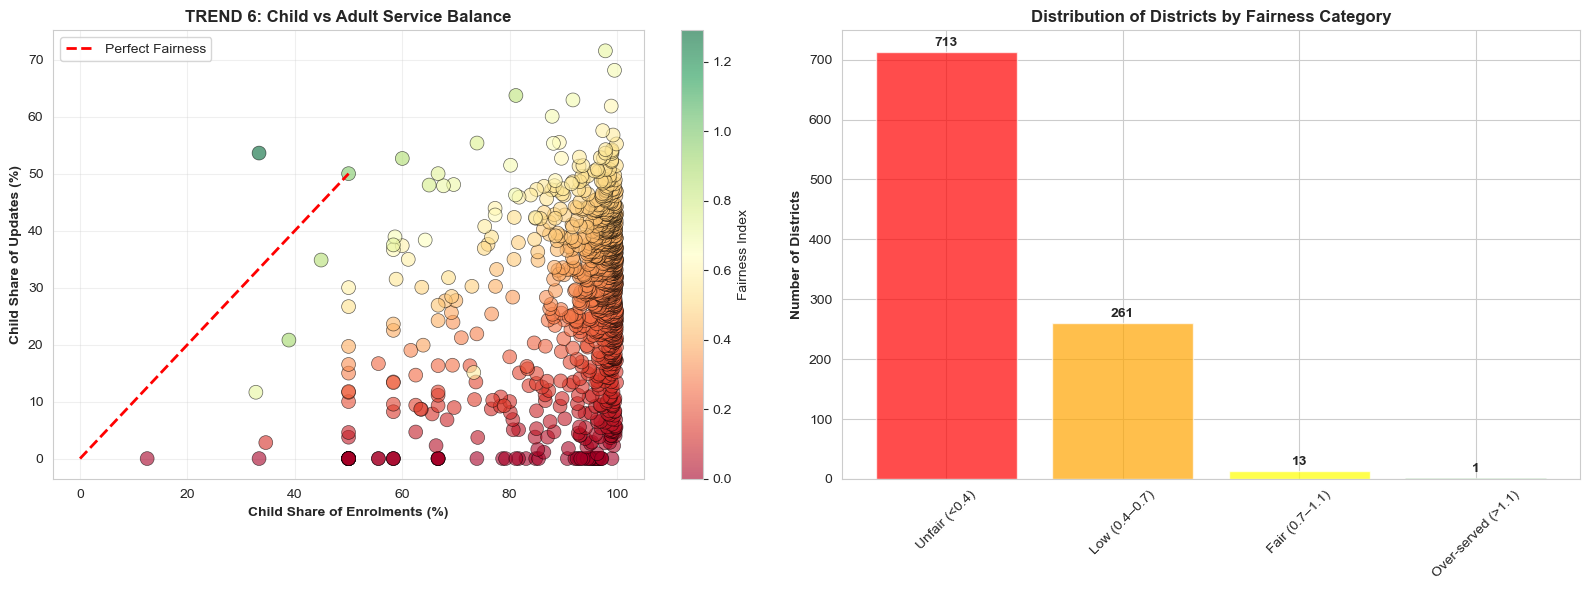

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

scatter = axes[0].scatter(
    fairness_districts['child_share_enrol'] * 100,
    fairness_districts['child_share_updates'] * 100,
    c=fairness_districts['fairness_index'],
    s=100,
    alpha=0.6,
    cmap='RdYlGn',
    edgecolors='black',
    linewidth=0.5
)
axes[0].plot(
    [0, 50],
    [0, 50],
    'r--',
    linewidth=2,
    label='Perfect Fairness'
)

axes[0].set_xlabel('Child Share of Enrolments (%)', fontweight='bold')
axes[0].set_ylabel('Child Share of Updates (%)', fontweight='bold')
axes[0].set_title('TREND 6: Child vs Adult Service Balance', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

plt.colorbar(scatter, ax=axes[0], label='Fairness Index')

fairness_categories = pd.cut(
    fairness_districts['fairness_index'],
    bins=[0, 0.4, 0.7, 1.1, 2.0],
    labels=[
        'Unfair (<0.4)',
        'Low (0.4–0.7)',
        'Fair (0.7–1.1)',
        'Over-served (>1.1)'
    ]
)

fairness_counts = fairness_categories.value_counts()

axes[1].bar(
    range(len(fairness_counts)),
    fairness_counts.values,
    color=['red', 'orange', 'yellow', 'green'],
    alpha=0.7
)

axes[1].set_xticks(range(len(fairness_counts)))
axes[1].set_xticklabels(fairness_counts.index, rotation=45)
axes[1].set_ylabel('Number of Districts', fontweight='bold')
axes[1].set_title(
    'Distribution of Districts by Fairness Category',
    fontweight='bold'
)

# Value labels
for i, v in enumerate(fairness_counts.values):
    axes[1].text(
        i,
        v + 10,
        str(v),
        ha='center',
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig(
    'trend6_fairness.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()


## COMPOSITE CHILD SERVICE INDEX (CSI)

In [ ]:
def compute_composite_index(data):
    """
    Compute Composite Child Service Index (CSI)
    by combining all six trend dimensions.
    """

    data_copy = data.copy()

    data_copy['bio_dropoff_pct'] = data_copy['bio_dropoff_ratio'].rank(pct=True)
    data_copy['correction_pct'] = data_copy['correction_pressure'].rank(pct=True)
    data_copy['enrol_pct'] = data_copy['child_total_enrol'].rank(pct=True)
    data_copy['fairness_pct'] = data_copy['fairness_index'].rank(pct=True)
    data_copy['risk_pct'] = data_copy['risk_score'].rank(pct=True)

    seasonal_vol = (
        data_copy
        .groupby(['state', 'district'])['seasonal_index']
        .std()
        .reset_index(name='seasonal_volatility')
    )

    data_copy = data_copy.merge(
        seasonal_vol,
        on=['state', 'district'],
        how='left'
    )

    data_copy['seasonal_vol_pct'] = (
        data_copy['seasonal_volatility']
        .rank(pct=True)
    )

    data_copy['csi'] = (
        0.25 * (1 - data_copy['bio_dropoff_pct']) +      # lower drop-off = better
        0.20 * (1 - data_copy['correction_pct']) +       # lower correction burden
        0.15 * data_copy['enrol_pct'] +                  # higher enrolment
        0.15 * data_copy['fairness_pct'] +               # better fairness
        0.15 * (1 - data_copy['seasonal_vol_pct']) +     # stable seasonality
        0.10 * (1 - data_copy['risk_pct'])               # lower persistent risk
    )

    district_csi = (
        data_copy
        .groupby(['state', 'district'], as_index=False)
        .agg(
            csi=('csi', 'mean'),
            bio_dropoff_ratio=('bio_dropoff_ratio', 'mean'),
            correction_pressure=('correction_pressure', 'mean'),
            child_total_enrol=('child_total_enrol', 'mean'),
            fairness_index=('fairness_index', 'mean')
        )
        .sort_values('csi')
    )

    district_csi['category'] = pd.cut(
        district_csi['csi'],
        bins=[0, 0.3, 0.6, 0.8, 1.0],
        labels=['Critical', 'At-Risk', 'Performing', 'Excellent']
    )

    return data_copy, district_csi


In [60]:
data, district_csi = compute_composite_index(data)


In [61]:
print("🚨 COMPOSITE CHILD SERVICE INDEX (CSI) – Top 30 CRITICAL Districts:\n")

display(
    district_csi[district_csi['category'] == 'Critical']
    [['state', 'district', 'csi', 'category']]
    .head(30)
)

print("\n📊 CSI Category Distribution:\n")
display(district_csi['category'].value_counts())


🚨 COMPOSITE CHILD SERVICE INDEX (CSI) – Top 30 CRITICAL Districts:



,state,district,csi,category
209,Dadra And Nagar Haveli And Daman And Diu,Daman,0.258769,Critical
671,Orissa,Bargarh,0.261774,Critical
208,Dadra And Nagar Haveli And Daman And Diu,Dadra And Nagar Haveli,0.267479,Critical
762,Rajasthan,Jalore,0.270509,Critical
201,Chhattisgarh,Sarangarh-Bilaigarh,0.272967,Critical
414,Karnataka,Gadag *,0.277455,Critical
752,Rajasthan,Deeg,0.279622,Critical
54,Arunachal Pradesh,Anjaw,0.296737,Critical



📊 CSI Category Distribution:



category
At-Risk       915
Performing     86
Critical        8
Excellent       0
Name: count, dtype: int64

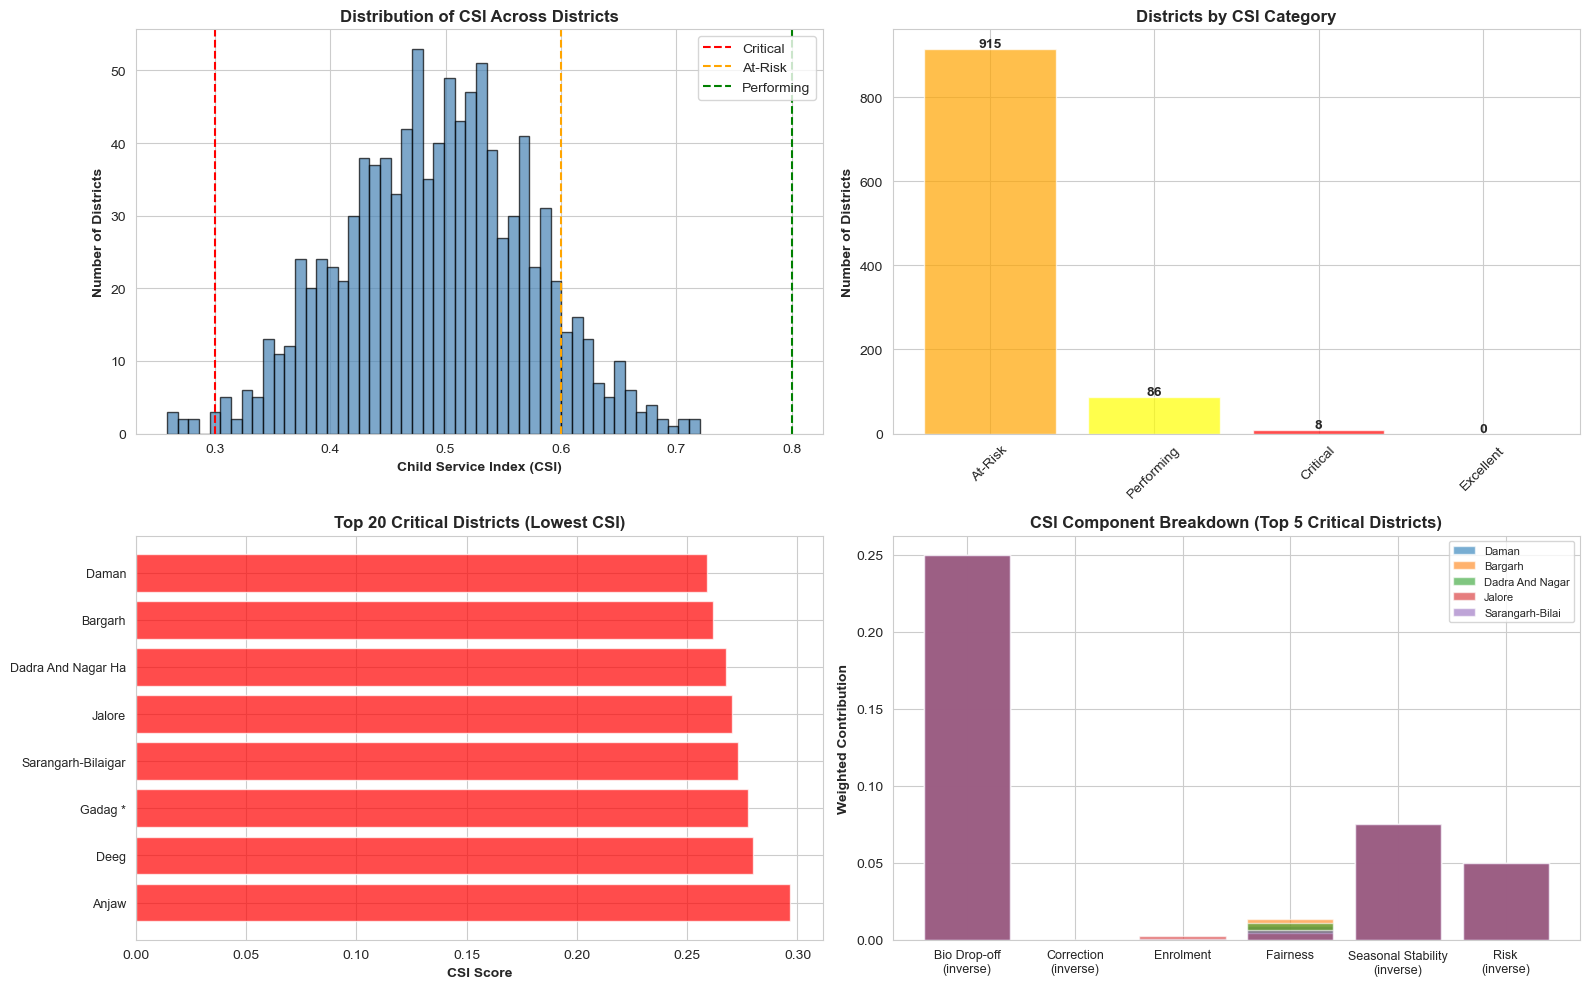

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].hist(
    district_csi['csi'],
    bins=50,
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)

axes[0, 0].set_xlabel('Child Service Index (CSI)', fontweight='bold')
axes[0, 0].set_ylabel('Number of Districts', fontweight='bold')
axes[0, 0].set_title('Distribution of CSI Across Districts', fontweight='bold')

axes[0, 0].axvline(x=0.3, color='red', linestyle='--', label='Critical')
axes[0, 0].axvline(x=0.6, color='orange', linestyle='--', label='At-Risk')
axes[0, 0].axvline(x=0.8, color='green', linestyle='--', label='Performing')
axes[0, 0].legend()

category_counts = district_csi['category'].value_counts()
colors_cat = {
    'Critical': 'red',
    'At-Risk': 'orange',
    'Performing': 'yellow',
    'Excellent': 'green'
}

axes[0, 1].bar(
    range(len(category_counts)),
    category_counts.values,
    color=[colors_cat.get(c, 'gray') for c in category_counts.index],
    alpha=0.7
)

axes[0, 1].set_xticks(range(len(category_counts)))
axes[0, 1].set_xticklabels(category_counts.index, rotation=45)
axes[0, 1].set_ylabel('Number of Districts', fontweight='bold')
axes[0, 1].set_title('Districts by CSI Category', fontweight='bold')

for i, v in enumerate(category_counts.values):
    axes[0, 1].text(i, v + 5, str(v), ha='center', fontweight='bold')

top_critical = district_csi[district_csi['category'] == 'Critical'].head(20)

axes[1, 0].barh(
    range(len(top_critical)),
    top_critical['csi'],
    color='red',
    alpha=0.7
)

axes[1, 0].set_yticks(range(len(top_critical)))
axes[1, 0].set_yticklabels(
    [row['district'][:18] for _, row in top_critical.iterrows()],
    fontsize=9
)

axes[1, 0].set_xlabel('CSI Score', fontweight='bold')
axes[1, 0].set_title('Top 20 Critical Districts (Lowest CSI)', fontweight='bold')
axes[1, 0].invert_yaxis()

top_5_critical = top_critical.head(5)

component_names = [
    'Bio Drop-off\n(inverse)',
    'Correction\n(inverse)',
    'Enrolment',
    'Fairness',
    'Seasonal Stability\n(inverse)',
    'Risk\n(inverse)'
]

for _, row in top_5_critical.iterrows():
    values = [
        0.25 * (1 - min(row['bio_dropoff_ratio'], 1)),
        0.20 * (1 - min(row['correction_pressure'], 1)),
        0.15 * (row['child_total_enrol'] / district_csi['child_total_enrol'].max()),
        0.15 * (row['fairness_index'] / 2),
        0.15 * 0.5,   # proxy
        0.10 * 0.5    # proxy
    ]
    axes[1, 1].bar(
        range(len(component_names)),
        values,
        alpha=0.6,
        label=row['district'][:15]
    )

axes[1, 1].set_xticks(range(len(component_names)))
axes[1, 1].set_xticklabels(component_names, fontsize=9)
axes[1, 1].set_ylabel('Weighted Contribution', fontweight='bold')
axes[1, 1].set_title('CSI Component Breakdown (Top 5 Critical Districts)', fontweight='bold')
axes[1, 1].legend(fontsize=8)

plt.tight_layout()
plt.savefig(
    'composite_csi_analysis.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()


## FINAL ANALYSIS SUMMARY & EXPORT

In [ ]:
print("=" * 80)
print("FINAL ANALYSIS SUMMARY")
print("=" * 80)
print(f"\n📍 Total Districts Analyzed: {len(district_csi)}")
print(f"🏛️ Total States Covered: {data['state'].nunique()}")
print(f"📅 Time Period: {data['year_month'].min()} → {data['year_month'].max()}")

print("\n📊 District Classification Breakdown:")
print(f"🔴 Critical Districts: {len(district_csi[district_csi['category'] == 'Critical'])}")
print(f"🟠 At-Risk Districts: {len(district_csi[district_csi['category'] == 'At-Risk'])}")
print(f"🟡 Performing Districts: {len(district_csi[district_csi['category'] == 'Performing'])}")
print(f"🟢 Excellent Districts: {len(district_csi[district_csi['category'] == 'Excellent'])}")
print("\n📈 National CSI Statistics:")
print(f"• Average CSI: {district_csi['csi'].mean():.3f}")
print(f"• Median CSI: {district_csi['csi'].median():.3f}")

FINAL ANALYSIS SUMMARY

📍 Total Districts Analyzed: 1045
🏛️ Total States Covered: 49
📅 Time Period: 2025-03 → 2025-12

📊 District Classification Breakdown:
🔴 Critical Districts: 8
🟠 At-Risk Districts: 915
🟡 Performing Districts: 86
🟢 Excellent Districts: 0

📈 National CSI Statistics:
• Average CSI: 0.492
• Median CSI: 0.495


In [64]:
display(
    district_csi['category']
    .value_counts()
    .rename_axis('CSI Category')
    .reset_index(name='Number of Districts')
)


,CSI Category,Number of Districts
0,At-Risk,915
1,Performing,86
2,Critical,8
3,Excellent,0


In [65]:
district_csi.to_csv('district_csi_final.csv', index=False)
dropoff_districts.to_csv('trend1_biometric_dropoff.csv', index=False)
correction_districts.to_csv('trend3_correction_pressure.csv', index=False)
persistent_high_risk.to_csv('trend4_persistent_risk.csv', index=False)
fairness_districts.to_csv('trend6_fairness.csv', index=False)

print("✅ All analysis files exported successfully.")


✅ All analysis files exported successfully.
